# Convolutional Neural Networks – Lab 1

RUBEN MARTINEZ GONZALEZ

my Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def load_image(rute,rgb = False):
    imagen = Image.open(rute)
    if not rgb:
      imagen = imagen.convert('L')  # Convertir a escala de grises
    return np.array(imagen)

In [3]:
def print_images(origin_image, filtered_image, filter_name):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(origin_image, cmap='gray')
    plt.title('Imagen Original')

    plt.subplot(1, 3, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'{filter_name}')

    plt.subplot(1, 3, 3)
    diferencia = np.abs(origin_image - filtered_image)
    plt.imshow(diferencia, cmap='gray')
    plt.title('Diferencias')

    plt.show()

In [4]:
imagen_original = load_image('./circuloRGB.jpeg')
# la imagen usada para estas pruebas la puede descargar e importar a su local storage en el sig link:
# https://drive.google.com/file/d/1YknUJew29Hz7n_CevKY8TiXkH1KNesma/view?google_abuse=GOOGLE_ABUSE_EXEMPTION%3DID%3Dab20169f25a2cb73:TM%3D1706546245:C%3Dr:IP%3D187.147.105.235-:S%3DmPynAcRu4C4-KvAjo73ph-0%3B+path%3D/%3B+domain%3Dgoogle.com%3B+expires%3DMon,+29-Jan-2024+19:37:25+GMT

# 1 - medianFiltering

Write a function medianFiltering which convolutes an image with a median
filter. The function should take two parameters – the matrix storing the image data
and a number indicating the size of the filter to be used. Try the function on a
grayscale image with three different sizes of filter and show the results (original
image vs filtered images). (25 pts

In [5]:
def medianFiltering(image, filter_size):
    height, width = image.shape
    filter_radius = filter_size // 2

    # Padded version of the image with zero-padding
    padded_image = np.pad(image, ((filter_radius, filter_radius), (filter_radius, filter_radius)), mode='constant')

    filtered_image = np.zeros_like(image)

    # Iterate over each pixel in the image
    for i in range(height):
        for j in range(width):
            # Extract the neighborhood of the pixel from the padded image
            neighborhood = padded_image[i:i+filter_size, j:j+filter_size]
            # Apply the median filtering to the neighborhood
            filtered_image[i, j] = np.median(neighborhood)
            #como la padded_image esta desfasada por el marco en -i -j ,
            # el vecindario calculado en i j va a quedar centrado en la imagen original

    return filtered_image

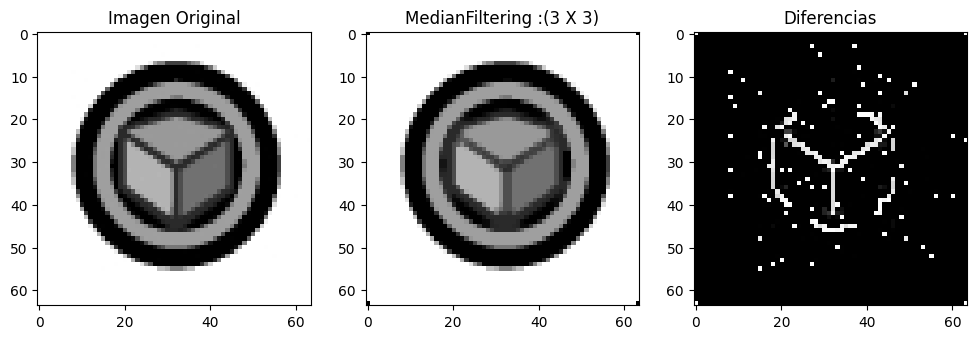

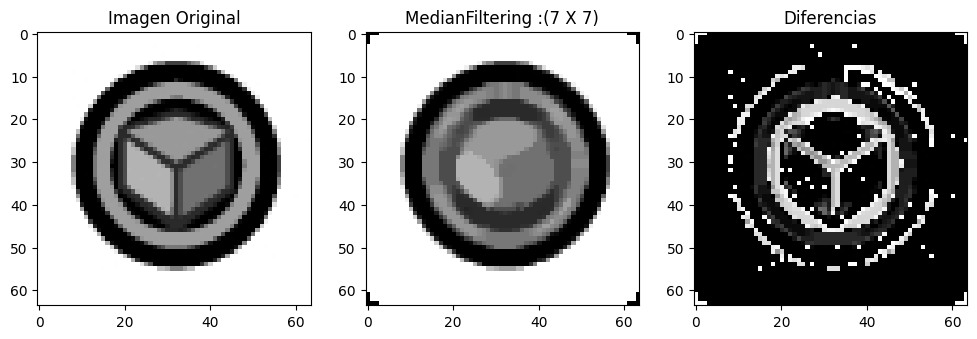

In [6]:
# Aplicar filtrado de mediana con diferentes tamaños de filtro
filter_sizes = [3, 5, 7]

for filter_size in filter_sizes:
    filted_image = medianFiltering(imagen_original, filter_size)
    print_images(imagen_original, filted_image, f'MedianFiltering :({filter_size} X {filter_size})')

# 2 - averageFiltering

Write a function averageFiltering which convolutes an image with an averaging
filter. The function should take two parameters – the matrix storing the image data
and a number indicating the size of the filter to be used. Try the function on a
grayscale image using three different sizes of filter and show the results (original
image vs filtered images). (25 pts

In [7]:
def averageFiltering (image, filter_matrix):
    height, width = image.shape
    filter_size = filter_matrix.shape[0]
    filter_radius = filter_size // 2

    # padded version of the image with zero-padding
    padded_image = np.pad(image, ((filter_radius, filter_radius), (filter_radius, filter_radius)), mode='constant')

    filtered_image = np.zeros_like(image)

    # Iterate over each pixel in the image
    for i in range(height):
        for j in range(width):
            # Extract the neighborhood of the pixel from the padded image
            neighborhood = padded_image[i:i+filter_size, j:j+filter_size]

            # Apply the weighted averaging using the filter matrix
            #         (I∗K)[i,j] = ∑​​∑       ​​I[i−m,j−n] ⋅ K[m,n]
            filtered_image[i, j] = np.sum(neighborhood * filter_matrix)
            #como la padded_image esta desfasada por el marco en -i -j ,
            # el vecindario calculado en i j va a quedar centrado en la imagen original

    return filtered_image

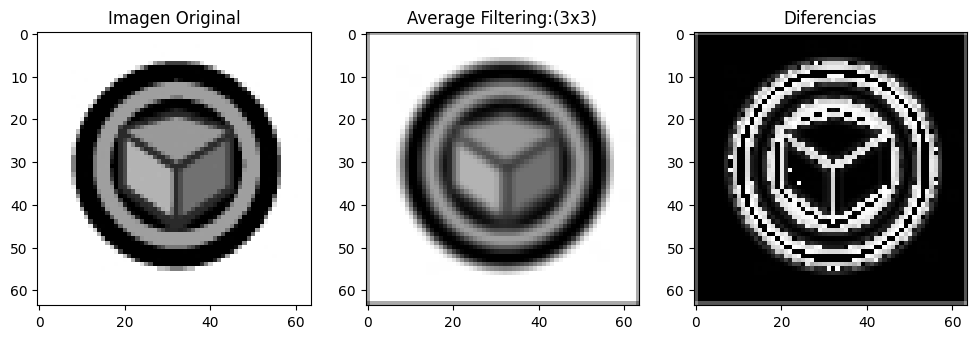

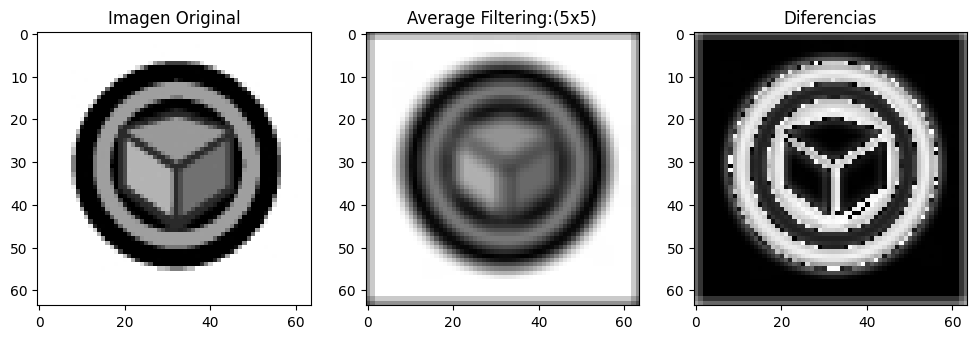

In [8]:
#---------------------------------------------------------------------------3x3
#  |1,1,1|
#  |1,1,1|   *1/9
#  |1,1,1|

average_filter_matrix = np.ones((3, 3))
# Normalizar la matriz dividiendo por la suma de todos los elementos
average_filter_matrix /= np.sum(average_filter_matrix)

filtered_image = averageFiltering (imagen_original, average_filter_matrix)
print_images(imagen_original, filtered_image, 'Average Filtering:(3x3)')

#---------------------------------------------------------------------------5x5

#  |1,1,1,1,1|
#  |1,1,1,1,1|
#  |1,1,1,1,1|   *1/25
#  |1,1,1,1,1|
#  |1,1,1,1,1|
average_filter_matrix = np.ones((5, 5))
# Normalizar la matriz dividiendo por la suma de todos los elementos
average_filter_matrix /= np.sum(average_filter_matrix)

filtered_image = averageFiltering (imagen_original, average_filter_matrix)
print_images(imagen_original, filtered_image, 'Average Filtering:(5x5)')

# 3 - weightavgFiltering

Write a function weightavgFiltering which convolutes an image with a gaussian
weighted averaging filter. The function should take two parameters – the matrix
storing the image data and a number indicating the size of the filter to be used.
Try the function on a grayscale image using two different sizes of filter and show
the results (original image vs filtered images). (25 pts

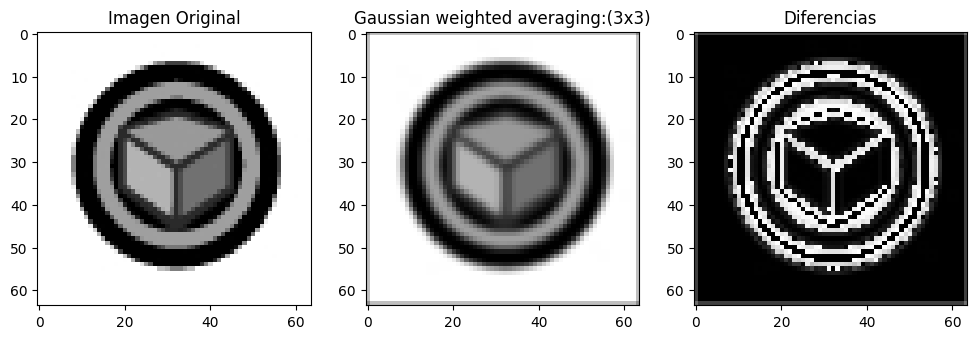

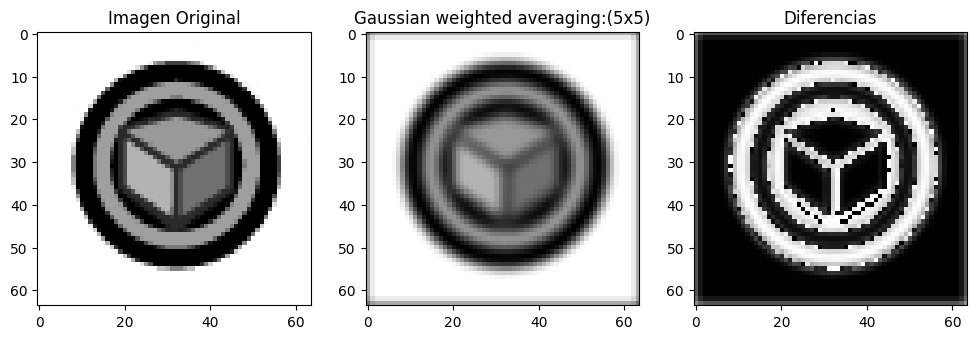

In [9]:
#---------------------------------------------------------------------------3x3
#  |1,2,1|
#  |2,4,2|   *1/16
#  |1,2,1|
# Definir la matriz de filtro gaussiano
gaussian_filter_matrix = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=float)

# Normalizar la matriz dividiendo por la suma de todos los elementos
gaussian_filter_matrix /= np.sum(gaussian_filter_matrix)
filtered_image = averageFiltering (imagen_original, gaussian_filter_matrix)

# Display the results
print_images(imagen_original, filtered_image, 'Gaussian weighted averaging:(3x3)')

#---------------------------------------------------------------------------5x5

#  |0,1,2,1,0|
#  |1,3,4,3,1|
#  |2,4,5,4,2|  *1/​​∑
#  |1,3,4,3,1|
#  |0,1,2,1,0|
# Definir la matriz de filtro gaussiano
gaussian_filter_matrix = np.array([
    [0,1,2,1,0],
    [1,3,4,3,1],
    [2,4,5,4,2],
    [1,3,4,3,1],
    [0,1,2,1,0],
], dtype=float)

# Normalizar la matriz dividiendo por la suma de todos los elementos
gaussian_filter_matrix /= np.sum(gaussian_filter_matrix)
filtered_image = averageFiltering (imagen_original, gaussian_filter_matrix)

# Display the results
print_images(imagen_original, filtered_image, 'Gaussian weighted averaging:(5x5)')

# 4 - avgcolorFiltering

Write a function avgcolorFiltering which convolutes a color image with an
averaging filter. The function should take two parameters – the matrix storing the
image data and a number indicating the size of the filter to be used. Try the
function on a color image using two different sizes of filter and show the results
(original image vs filtered images). (25 pts

In [10]:
imagen_originalRGB = load_image('./circuloRGB.jpeg',rgb = True)

In [11]:
def avgcolorFiltering (image, filter_matrix):
    height, width, channels = image.shape
    filter_size = filter_matrix.shape[0]
    filter_radius = filter_size // 2

    # padded version with zero-padding in 3 dimensions
                                    #padding 'x'                        #padding 'y'             #no padding 'shape'
    padded_image = np.pad(image, ((filter_radius, filter_radius), (filter_radius, filter_radius), (0, 0)), mode='constant')

    filtered_image = np.zeros_like(image)

    # Iterate over each pixel in the image
    for i in range(height):
        for j in range(width):
                #vecinos                     (rango en i     rango en j       x3capas de color)
                neighborhood = padded_image[i:i+filter_size, j:j+filter_size, :]
                filtered_image[i, j] = np.sum(neighborhood * filter_matrix)

    return filtered_image

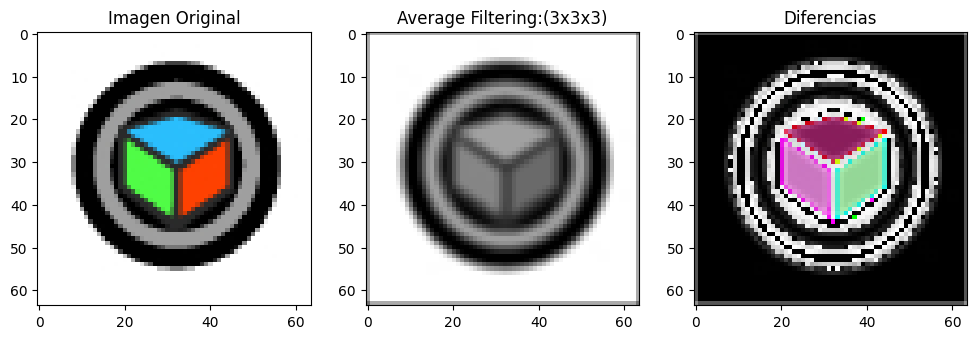

In [12]:
#--------------------------------------------------------------------------3x3x3
filter_length: int = 3
average_filter_matrix = np.ones((filter_length,filter_length,3))
# Normalizar la matriz dividiendo por la suma de todos los elementos
average_filter_matrix /= np.sum(average_filter_matrix)

filtered_image = avgcolorFiltering(imagen_originalRGB, average_filter_matrix)
print_images(imagen_originalRGB, filtered_image, 'Average Filtering:(3x3x3)')

#--------------------------------------------------------------------------5x5x3
filter_length: int = 5
average_filter_matrix = np.ones((filter_length,filter_length,3))
# Normalizar la matriz dividiendo por la suma de todos los elementos
average_filter_matrix /= np.sum(average_filter_matrix)

filtered_image = avgcolorFiltering(imagen_originalRGB, average_filter_matrix)
print_images(imagen_originalRGB, filtered_image, 'Average Filtering:(5x5x3)')

Adicional:
se realizo un suavisado en imagen a color convolucionando una matriz nxn en cada capa de la imagen a color por independiente de manera adicional a modo de experimento

In [13]:
def filteringRGB(image, filter_matrix):
    height, width, channels = image.shape
    filter_size = filter_matrix.shape[0]
    print(filter_size)
    filter_radius = filter_size // 2

    # Create a padded version of the image with zero-padding
    padded_image = np.pad(image, ((filter_radius, filter_radius), (filter_radius, filter_radius), (0, 0)), mode='constant')

    filtered_image = np.zeros_like(image)

    # Iterate over each pixel in the image
    for i in range(height):
        for j in range(width):
            for c in range(channels):
                neighborhood = padded_image[i:i+filter_size, j:j+filter_size, c]
                filtered_image[i, j, c] = np.sum(neighborhood * filter_matrix)

            # filtered_image[i, j, c] = np.sum(neighborhood[:, :, c] * filter_matrix)
            #
            # # Extract the neighborhood of the pixel from the padded image
            # neighborhood1 = padded_image[i:i+filter_size, j:j+filter_size, 0]
            # neighborhood2 = padded_image[i:i+filter_size, j:j+filter_size, 1]
            # neighborhood3 = padded_image[i:i+filter_size, j:j+filter_size, 2]
            #
            # filtered_image[i, j, 0] = np.sum(neighborhood1 * filter_matrix)
            # filtered_image[i, j, 1] = np.sum(neighborhood2 * filter_matrix)
            # filtered_image[i, j, 2] = np.sum(neighborhood3 * filter_matrix)


    return filtered_image

In [15]:
#---------------------------------------------------------------------------3x3
filter_length: int = 3
average_filter_matrix = np.ones((filter_length,filter_length)) / filter_length**2

filtered_image = filteringRGB(imagen_originalRGB, average_filter_matrix)
print_images(imagen_originalRGB, filtered_image, 'Average Filtering:(3x3)')


#---------------------------------------------------------------------------5x5
filter_length: int = 5
average_filter_matrix = np.ones((filter_length,filter_length)) / filter_length**2

filtered_image = filteringRGB(imagen_originalRGB, average_filter_matrix)
print_images(imagen_originalRGB, filtered_image, 'Average Filtering:(5x5)')



3


5
